In [1]:
import pandas as pd
import regex
import re

import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt

from pathlib import Path

import sys
src_path = str(Path.cwd().parent / "src")
sys.path.append(src_path)
# python file with all the functions
import topic_classification as tc

In [2]:
filepath = Path.cwd().parent / "speeches_csv" / "all_speeches_cleaned.txt"
df=pd.read_csv(filepath, usecols=['title','content'])
df.head()

,title,content
0,CGI_2013,Hillary Clinton: Thank you very much. I have t...
1,Prayer_Breakfast_2016,"Well, good morning. Giving all praise and hono..."
2,Security_Team_Announcement,"Good morning, everybody. I hope you all had a ..."
3,Cairo_University,Thank you so much. Good afternoon. I am honore...
4,Umpqua_Community_College_Shootings,There's been another mass shooting in America ...


In [3]:
df['text']=df['content'].str.lower()
df.head()

,title,content,text
0,CGI_2013,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank you very much. i have t...
1,Prayer_Breakfast_2016,"Well, good morning. Giving all praise and hono...","well, good morning. giving all praise and hono..."
2,Security_Team_Announcement,"Good morning, everybody. I hope you all had a ...","good morning, everybody. i hope you all had a ..."
3,Cairo_University,Thank you so much. Good afternoon. I am honore...,thank you so much. good afternoon. i am honore...
4,Umpqua_Community_College_Shootings,There's been another mass shooting in America ...,there's been another mass shooting in america ...


In [4]:
# tokenize into sentences
df['tokenized']=df['text'].apply(lambda text: nltk.sent_tokenize(text))
df[['text','tokenized']].head()

,text,tokenized
0,hillary clinton: thank you very much. i have t...,"[hillary clinton: thank you very much., i have..."
1,"well, good morning. giving all praise and hono...","[well, good morning., giving all praise and ho..."
2,"good morning, everybody. i hope you all had a ...","[good morning, everybody., i hope you all had ..."
3,thank you so much. good afternoon. i am honore...,"[thank you so much., good afternoon., i am hon..."
4,there's been another mass shooting in america ...,[there's been another mass shooting in america...


In [5]:
# the '\b(?!\d)' filters out expressions like '9th', since the first character cannot be a number
tokenizer = RegexpTokenizer(r'\b(?!\d)[a-zA-Z]+')
lemmatizer = WordNetLemmatizer()
df['normalized']=df['tokenized'].apply(lambda text: tc.normalize_text(text, tokenizer, lemmatizer))
df[['text','tokenized','normalized']].head()

,text,tokenized,normalized
0,hillary clinton: thank you very much. i have t...,"[hillary clinton: thank you very much., i have...",hillary clinton thank you very much i have th...
1,"well, good morning. giving all praise and hono...","[well, good morning., giving all praise and ho...",well good morning give all praise and honor t...
2,"good morning, everybody. i hope you all had a ...","[good morning, everybody., i hope you all had ...",good morning everybody i hope you all have a ...
3,thank you so much. good afternoon. i am honore...,"[thank you so much., good afternoon., i am hon...",thank you so much good afternoon i be honor t...
4,there's been another mass shooting in america ...,[there's been another mass shooting in america...,there s be another mass shooting in america t...


In [6]:
STOPWORDS = set(stopwords.words('english'))
df['fully_processed'] = df['normalized'].apply(lambda text: tc.remove_stopwords(text, STOPWORDS))
df[['text','tokenized','normalized','fully_processed']].head()

,text,tokenized,normalized,fully_processed
0,hillary clinton: thank you very much. i have t...,"[hillary clinton: thank you very much., i have...",hillary clinton thank you very much i have th...,hillary clinton thank much great pleasure intr...
1,"well, good morning. giving all praise and hono...","[well, good morning., giving all praise and ho...",well good morning give all praise and honor t...,well good morning give praise honor god bring ...
2,"good morning, everybody. i hope you all had a ...","[good morning, everybody., i hope you all had ...",good morning everybody i hope you all have a ...,good morning everybody hope wonderful thanksgi...
3,thank you so much. good afternoon. i am honore...,"[thank you so much., good afternoon., i am hon...",thank you so much good afternoon i be honor t...,thank much good afternoon honor timeless city ...
4,there's been another mass shooting in america ...,[there's been another mass shooting in america...,there s be another mass shooting in america t...,another mass shooting america time community c...


In [7]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf_matrix = tf_vectorizer.fit_transform(df['fully_processed'])
tf_feature_names = tf_vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(tf_matrix.toarray(), columns = tf_feature_names)
tf_df

,aa,aaa,aaron,aarp,abadi,abandon,abbas,abbott,abc,abdi,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,1,2,0,0,0,...,0,4,0,0,0,0,0,0,0,0
434,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
lda.fit(tf_matrix) 

LatentDirichletAllocation(random_state=0)

In [9]:
result = pd.DataFrame(lda.components_, columns = tf_feature_names)
result

,aa,aaa,aaron,aarp,abadi,abandon,abbas,abbott,abc,abdi,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,0.100000,0.100012,0.100023,0.100006,0.100000,0.100007,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100010,0.100000,0.100000,0.100014,0.100000,0.100000,0.100017,0.100004,0.100000
1,0.100050,2.099979,0.100002,4.099983,0.100004,3.736362,0.100000,0.100000,0.100001,0.100000,...,0.100002,0.100001,0.100000,0.100000,0.100000,0.100000,0.100000,0.100010,0.100008,0.100000
2,0.100009,0.100002,1.017137,0.100010,0.100000,5.603248,0.569867,0.100000,0.100010,0.100008,...,0.100017,0.100010,0.100007,0.100007,0.100002,0.100000,0.100001,2.735031,0.100007,3.099760
3,0.100000,0.100000,0.100000,0.100000,0.100040,2.947302,0.100027,1.099997,0.100000,0.100003,...,0.100084,0.100000,0.100000,0.100000,0.100000,0.100016,0.100000,0.100000,0.100019,0.100000
4,0.100000,0.100000,0.100095,0.100000,9.157050,16.900545,0.100000,0.100003,1.099956,0.100020,...,0.100000,0.100030,0.100000,0.100000,0.100000,0.100006,0.100000,0.100000,19.642863,0.100000
5,1.173841,0.100001,0.100212,0.100000,0.100001,0.547996,0.100016,0.100000,2.099977,0.100007,...,0.100093,0.100001,0.100002,0.100003,2.099967,0.100011,0.100017,1.024850,4.763645,0.100062
6,0.100007,0.100000,1.125198,0.100000,0.100004,14.948690,9.630028,0.100000,0.100004,3.099921,...,0.100079,0.419638,4.099986,4.099987,0.100000,2.099963,4.098477,0.100000,0.100012,0.100115
7,0.100000,0.100000,0.100023,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
8,1.026094,0.100004,5.157275,0.100000,11.042900,2.696771,0.100056,0.100003,0.100038,0.100036,...,0.100012,21.173803,0.100000,0.100000,0.100012,0.100002,0.100000,0.540092,15.873986,0.100000
9,0.100000,0.100001,0.100035,0.100000,0.100000,4.419079,0.100006,2.099997,0.100014,0.100006,...,2.099713,0.706507,0.100006,0.100003,0.100004,0.100002,0.101506,0.100000,0.119454,0.100064


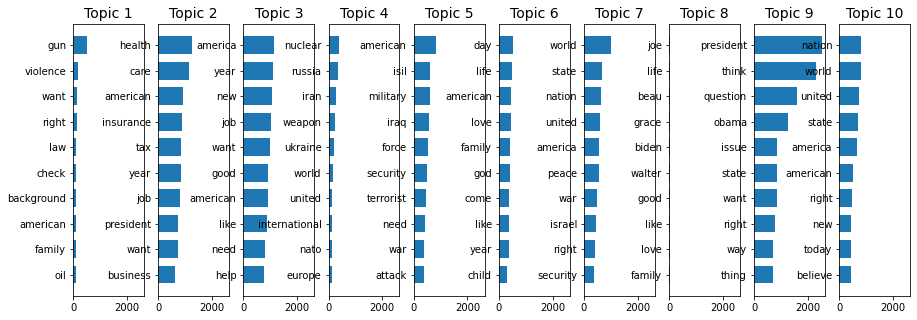

In [10]:
n_top_words = 10
fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

In [11]:
from collections import Counter
cnt1 = Counter()
for text in df["fully_processed"].values:
    for word in text.split():
        cnt1[word] += 1
        
mostcommon = cnt1.most_common(30)
mostcommon = [x[0] for x in mostcommon]
mostcommon
# maybe use tf-idf to determine words to remove?

['people',
 'go',
 'make',
 'get',
 'work',
 'us',
 'president',
 'say',
 'american',
 'one',
 'country',
 'year',
 'know',
 'think',
 'want',
 'state',
 'time',
 'right',
 'take',
 'world',
 'america',
 'come',
 'like',
 'good',
 'see',
 'would',
 'new',
 'need',
 'way',
 'united']

In [12]:
remove = mostcommon + ['thing','help','great','day','tell','thank','mr','question','sure','look','today','obama',
                           'really','happen','try','lot','important','continue','let','million','talk','va']
df['wo_freq'] = df['fully_processed'].apply(lambda text: tc.remove_stopwords(text, remove))

df.head(15)

,title,content,text,tokenized,normalized,fully_processed,wo_freq
0,CGI_2013,Hillary Clinton: Thank you very much. I have t...,hillary clinton: thank you very much. i have t...,"[hillary clinton: thank you very much., i have...",hillary clinton thank you very much i have th...,hillary clinton thank much great pleasure intr...,hillary clinton much pleasure introduce next t...
1,Prayer_Breakfast_2016,"Well, good morning. Giving all praise and hono...","well, good morning. giving all praise and hono...","[well, good morning., giving all praise and ho...",well good morning give all praise and honor t...,well good morning give praise honor god bring ...,well morning give praise honor god bring toget...
2,Security_Team_Announcement,"Good morning, everybody. I hope you all had a ...","good morning, everybody. i hope you all had a ...","[good morning, everybody., i hope you all had ...",good morning everybody i hope you all have a ...,good morning everybody hope wonderful thanksgi...,morning everybody hope wonderful thanksgiving ...
3,Cairo_University,Thank you so much. Good afternoon. I am honore...,thank you so much. good afternoon. i am honore...,"[thank you so much., good afternoon., i am hon...",thank you so much good afternoon i be honor t...,thank much good afternoon honor timeless city ...,much afternoon honor timeless city cairo host ...
4,Umpqua_Community_College_Shootings,There's been another mass shooting in America ...,there's been another mass shooting in america ...,[there's been another mass shooting in america...,there s be another mass shooting in america t...,another mass shooting america time community c...,another mass shooting community college oregon...
5,White_House_Correspondent_Dinner_2013,"Thank you. Thank you, everybody. How do you li...","thank you. thank you, everybody. how do you li...","[thank you., thank you, everybody., how do you...",thank you thank you everybody how do you like...,thank thank everybody like new entrance music ...,everybody entrance music rush limbaugh warn se...
6,Border_Security_and_Immigration_Reform,"Good afternoon, everybody. One year ago this m...","good afternoon, everybody. one year ago this m...","[good afternoon, everybody., one year ago this...",good afternoon everybody one year ago this mo...,good afternoon everybody one year ago month se...,afternoon everybody ago month senator party su...
7,Senate_Floor_Immigration_Reform,"Mr. President, Last year I spoke1 at one of th...","mr. president, last year i spoke1 at one of th...","[mr. president, last year i spoke1 at one of t...",mr president last year i speak at one of the ...,mr president last year speak one march chicago...,last speak march chicago comprehensive immigra...
8,Presser_on_the_Economy_and_Debt_Limit,I just want to say a few words about the econo...,i just want to say a few words about the econo...,[i just want to say a few words about the econ...,i just want to say a few word about the econo...,want say word economy take question lot folk s...,word economy folk still struggle effect recess...
9,Kennedy_Center_Honorees_2009,President Obama: Thank you. On behalf of Miche...,president obama: thank you. on behalf of miche...,"[president obama: thank you., on behalf of mic...",president obama thank you on behalf of michel...,president obama thank behalf michelle welcome ...,behalf michelle welcome white house little chi...


In [13]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')
tf_matrix = tf_vectorizer.fit_transform(df['wo_freq'])
tf_feature_names = tf_vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(tf_matrix.toarray(), columns = tf_feature_names)
tf_df

,aa,aaa,aaron,aarp,abadi,abandon,abbas,abbott,abc,abdi,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,1,2,0,0,0,...,0,4,0,0,0,0,0,0,0,0
434,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
lda.fit(tf_matrix) 
result = pd.DataFrame(lda.components_)
result.columns = tf_feature_names
result

,aa,aaa,aaron,aarp,abadi,abandon,abbas,abbott,abc,abdi,...,zerosum,zika,zimbabwe,zimbabwean,zimmerman,zionism,zionist,zip,zone,zuma
0,0.100012,0.100000,0.100000,0.100000,9.120507,6.499242,4.433712,1.099981,0.100000,2.237172,...,0.100033,0.100018,0.100001,0.100012,0.100000,1.300354,0.100016,0.100040,1.901503,0.100000
1,0.100002,0.100000,3.273669,0.100000,11.079472,15.296129,0.100001,0.100014,1.099981,0.100014,...,0.100000,15.016810,0.100000,0.100000,0.100001,0.100030,0.100000,0.100054,21.386686,0.100000
2,0.100001,0.100005,2.669801,0.100000,0.100003,4.995205,0.100156,0.100000,2.099998,0.100007,...,0.100072,0.100094,0.100000,0.100000,2.099895,0.100000,0.100000,0.100251,1.575815,0.100000
3,0.100000,0.100000,0.100027,0.100000,0.100001,0.100017,0.100000,0.100005,0.100001,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.100062,0.100154,0.100000,0.100000,0.100014,0.100000
4,0.100004,0.100001,0.100007,0.100001,0.100000,13.841246,5.766098,0.100009,0.100002,0.100009,...,0.100152,6.692813,3.624042,2.533628,0.100004,0.899459,4.099984,0.100003,0.100010,2.636342
5,2.099935,0.100001,0.100009,4.099972,0.100007,0.100008,0.100001,0.100000,0.100001,0.100000,...,0.100000,0.100004,0.100000,0.100000,0.100000,0.100000,0.100000,1.241289,0.100014,0.100000
6,0.100007,2.099990,0.100003,0.100026,0.100000,6.700181,0.100007,0.100000,0.100000,0.100000,...,0.100001,0.590181,0.100000,0.100000,0.100000,0.100000,0.100000,0.100034,0.100010,0.100000
7,0.100000,0.100000,1.356446,0.100001,0.100000,4.161332,0.100006,0.100009,0.100000,0.962755,...,2.099571,0.100002,0.100005,0.178497,0.100007,0.100002,0.100000,0.100001,9.557527,0.100000
8,0.100000,0.100000,0.100008,0.100000,0.100007,0.100030,0.100015,2.099982,0.100017,0.100028,...,0.100003,0.100075,0.575952,1.587863,0.100000,0.100000,0.100000,0.100029,5.474055,0.563658
9,0.100039,0.100003,0.100030,0.100001,0.100002,0.206610,0.100002,0.100000,0.100001,0.100015,...,0.100168,0.100004,0.100000,0.100000,0.100032,0.100000,0.100000,2.958300,0.704366,0.100000


['iran', 'nuclear', 'israel', 'weapon', 'international', 'security', 'deal', 'russia', 'sanction', 'issue']
['isil', 'terrorist', 'security', 'attack', 'syria', 'military', 'government', 'intelligence', 'force', 'iraq']
['issue', 'problem', 'cuban', 'cuba', 'election', 'everybody', 'government', 'court', 'vote', 'change']
['family', 'god', 'love', 'life', 'faith', 'muslim', 'heart', 'place', 'lose', 'prayer']
['nation', 'change', 'believe', 'democracy', 'young', 'child', 'freedom', 'stand', 'life', 'future']
['health', 'care', 'insurance', 'cost', 'reform', 'law', 'republican', 'plan', 'affordable', 'provide']
['job', 'economy', 'business', 'tax', 'cut', 'pay', 'energy', 'governor', 'family', 'company']
['war', 'nation', 'force', 'iraq', 'veteran', 'afghanistan', 'serve', 'military', 'troop', 'security']
['china', 'young', 'region', 'asia', 'government', 'trade', 'global', 'security', 'economy', 'include']
['gun', 'life', 'community', 'family', 'child', 'school', 'law', 'kid', 'everybo

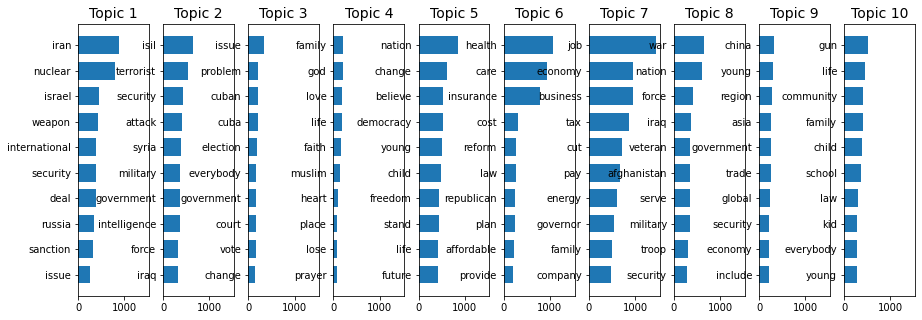

In [15]:
n_top_words = 10
fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    print(top_features)
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

In [16]:
classification_df = tc.classify_topics(lda, tf_matrix, df.title.values)
classification_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,title
0,0.004546,0.004546,0.004546,0.004546,0.004547,99.959081,0.004547,0.004546,0.004547,0.004547,CGI_2013
1,0.010837,0.010837,0.010837,36.505629,63.407674,0.010837,0.010837,0.010837,0.010837,0.010838,Prayer_Breakfast_2016
2,4.467614,35.979346,8.267141,0.013989,0.013990,0.013989,2.562048,45.322896,3.344997,0.013990,Security_Team_Announcement
3,27.253440,0.411268,0.004629,5.413169,52.514886,0.004629,0.004629,10.692340,3.696382,0.004629,Cairo_University
4,0.024102,7.998436,0.024104,14.032246,0.024102,0.024103,2.794852,0.024101,0.024102,75.029852,Umpqua_Community_College_Shootings
...,...,...,...,...,...,...,...,...,...,...,...
431,0.006682,0.006682,0.006681,0.006682,5.825996,0.006682,3.925735,1.519621,88.688560,0.006682,ASEAN_Business_2015
432,0.024337,3.129993,0.024337,0.024336,0.024339,3.300106,90.727931,0.024339,0.024337,2.695946,Finance_Crisis_Fee
433,2.318545,0.004064,17.322466,0.004064,27.720477,1.793196,21.790140,0.004064,24.674573,4.368410,YLAI_Town_Hall
434,0.013911,85.850172,0.013911,7.494962,6.557486,0.013911,0.013911,0.013912,0.013911,0.013912,Oval_Office_Counter_Terrorism_Agenda


In [17]:
tc.nb_topics_above_percentage(classification_df, 10)
tc.nb_topics_above_percentage(classification_df, 20)
classification_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,title,nb_topics_above_10_percent,nb_topics_above_20_percent
0,0.004546,0.004546,0.004546,0.004546,0.004547,99.959081,0.004547,0.004546,0.004547,0.004547,CGI_2013,1,1
1,0.010837,0.010837,0.010837,36.505629,63.407674,0.010837,0.010837,0.010837,0.010837,0.010838,Prayer_Breakfast_2016,2,2
2,4.467614,35.979346,8.267141,0.013989,0.013990,0.013989,2.562048,45.322896,3.344997,0.013990,Security_Team_Announcement,2,2
3,27.253440,0.411268,0.004629,5.413169,52.514886,0.004629,0.004629,10.692340,3.696382,0.004629,Cairo_University,3,2
4,0.024102,7.998436,0.024104,14.032246,0.024102,0.024103,2.794852,0.024101,0.024102,75.029852,Umpqua_Community_College_Shootings,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.006682,0.006682,0.006681,0.006682,5.825996,0.006682,3.925735,1.519621,88.688560,0.006682,ASEAN_Business_2015,1,1
432,0.024337,3.129993,0.024337,0.024336,0.024339,3.300106,90.727931,0.024339,0.024337,2.695946,Finance_Crisis_Fee,1,1
433,2.318545,0.004064,17.322466,0.004064,27.720477,1.793196,21.790140,0.004064,24.674573,4.368410,YLAI_Town_Hall,4,3
434,0.013911,85.850172,0.013911,7.494962,6.557486,0.013911,0.013911,0.013912,0.013911,0.013912,Oval_Office_Counter_Terrorism_Agenda,1,1


In [18]:
print('over 10%')
print('min:', classification_df.loc[:,"nb_topics_above_10_percent"].min())
print('avg:', classification_df.loc[:,"nb_topics_above_10_percent"].mean())
print('max:', classification_df.loc[:,"nb_topics_above_10_percent"].max())
print('\nover 20%')
print('min:', classification_df.loc[:,"nb_topics_above_20_percent"].min())
print('avg:', classification_df.loc[:,"nb_topics_above_20_percent"].mean())
print('max:', classification_df.loc[:,"nb_topics_above_20_percent"].max())

over 10%
min: 1
avg: 2.25
max: 5

over 20%
min: 1
avg: 1.6238532110091743
max: 3


In [19]:
topics_df = pd.DataFrame()
nb_speeches = classification_df.shape[0]
tc.percentage_speeches_above_percentage(10, nb_speeches, classification_df, topics_df)
tc.percentage_speeches_above_percentage(20, nb_speeches, classification_df, topics_df)
topics_df

,percentage_speeches_above_10_percent,percentage_speeches_above_20_percent
Topic 1,14.908257,10.779817
Topic 2,24.770642,17.889908
Topic 3,17.431193,12.155963
Topic 4,13.532110,10.091743
Topic 5,37.155963,28.669725
Topic 6,10.321101,7.339450
Topic 7,32.110092,23.394495
Topic 8,26.376147,17.660550
Topic 9,16.972477,12.155963
Topic 10,31.422018,22.247706


In [20]:
tc.sum_of_n_largest(2, classification_df)
tc.sum_of_n_largest(3, classification_df)
tc.sum_of_n_largest(4, classification_df)
classification_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,title,nb_topics_above_10_percent,nb_topics_above_20_percent,sum_of_2_largest,sum_of_3_largest,sum_of_4_largest
0,0.004546,0.004546,0.004546,0.004546,0.004547,99.959081,0.004547,0.004546,0.004547,0.004547,CGI_2013,1,1,99.963628,99.968175,99.972722
1,0.010837,0.010837,0.010837,36.505629,63.407674,0.010837,0.010837,0.010837,0.010837,0.010838,Prayer_Breakfast_2016,2,2,99.913303,99.924140,99.934978
2,4.467614,35.979346,8.267141,0.013989,0.013990,0.013989,2.562048,45.322896,3.344997,0.013990,Security_Team_Announcement,2,2,81.302242,89.569383,94.036997
3,27.253440,0.411268,0.004629,5.413169,52.514886,0.004629,0.004629,10.692340,3.696382,0.004629,Cairo_University,3,2,79.768327,90.460667,95.873835
4,0.024102,7.998436,0.024104,14.032246,0.024102,0.024103,2.794852,0.024101,0.024102,75.029852,Umpqua_Community_College_Shootings,2,1,89.062097,97.060533,99.855386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.006682,0.006682,0.006681,0.006682,5.825996,0.006682,3.925735,1.519621,88.688560,0.006682,ASEAN_Business_2015,1,1,94.514555,98.440290,99.959910
432,0.024337,3.129993,0.024337,0.024336,0.024339,3.300106,90.727931,0.024339,0.024337,2.695946,Finance_Crisis_Fee,1,1,94.028037,97.158030,99.853975
433,2.318545,0.004064,17.322466,0.004064,27.720477,1.793196,21.790140,0.004064,24.674573,4.368410,YLAI_Town_Hall,4,3,52.395050,74.185190,91.507656
434,0.013911,85.850172,0.013911,7.494962,6.557486,0.013911,0.013911,0.013912,0.013911,0.013912,Oval_Office_Counter_Terrorism_Agenda,1,1,93.345134,99.902620,99.916533


In [21]:
print('sum of 2 largest')
print('min:', classification_df.loc[:,"sum_of_2_largest"].min())
print('avg:', classification_df.loc[:,"sum_of_2_largest"].mean())
print('med:', classification_df.loc[:,"sum_of_2_largest"].median())
print('max:', classification_df.loc[:,"sum_of_2_largest"].max())
print('\nsum of 3 largest')
print('min:', classification_df.loc[:,"sum_of_3_largest"].min())
print('avg:', classification_df.loc[:,"sum_of_3_largest"].mean())
print('med:', classification_df.loc[:,"sum_of_3_largest"].median())
print('max:', classification_df.loc[:,"sum_of_3_largest"].max())
print('\nsum of 4 largest')
print('min:', classification_df.loc[:,"sum_of_4_largest"].min())
print('avg:', classification_df.loc[:,"sum_of_4_largest"].mean())
print('med:', classification_df.loc[:,"sum_of_4_largest"].median())
print('max:', classification_df.loc[:,"sum_of_4_largest"].max())

sum of 2 largest
min: 52.39505041998201
avg: 87.02031928621294
med: 89.60204121323392
max: 99.98419265942675

sum of 3 largest
min: 67.82237183696857
avg: 95.25800026900777
med: 99.18095991201884
max: 99.98616864454361

sum of 4 largest
min: 77.38378121879212
avg: 98.4288939960445
med: 99.88568770698724
max: 99.98819052125802


In [22]:
tc.sort_topics_per_speech(lda.n_components, classification_df)
classification_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,main_topic_6,main_topic_6_perc,main_topic_7,main_topic_7_perc,main_topic_8,main_topic_8_perc,main_topic_9,main_topic_9_perc,main_topic_10,main_topic_10_perc
0,0.004546,0.004546,0.004546,0.004546,0.004547,99.959081,0.004547,0.004546,0.004547,0.004547,...,Topic 3,0.004546,Topic 1,0.004546,Topic 2,0.004546,Topic 8,0.004546,Topic 4,0.004546
1,0.010837,0.010837,0.010837,36.505629,63.407674,0.010837,0.010837,0.010837,0.010837,0.010838,...,Topic 2,0.010837,Topic 3,0.010837,Topic 7,0.010837,Topic 9,0.010837,Topic 6,0.010837
2,4.467614,35.979346,8.267141,0.013989,0.013990,0.013989,2.562048,45.322896,3.344997,0.013990,...,Topic 7,2.562048,Topic 5,0.013990,Topic 10,0.013990,Topic 6,0.013989,Topic 4,0.013989
3,27.253440,0.411268,0.004629,5.413169,52.514886,0.004629,0.004629,10.692340,3.696382,0.004629,...,Topic 2,0.411268,Topic 7,0.004629,Topic 3,0.004629,Topic 10,0.004629,Topic 6,0.004629
4,0.024102,7.998436,0.024104,14.032246,0.024102,0.024103,2.794852,0.024101,0.024102,75.029852,...,Topic 6,0.024103,Topic 5,0.024102,Topic 1,0.024102,Topic 9,0.024102,Topic 8,0.024101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0.006682,0.006682,0.006681,0.006682,5.825996,0.006682,3.925735,1.519621,88.688560,0.006682,...,Topic 4,0.006682,Topic 10,0.006682,Topic 1,0.006682,Topic 6,0.006682,Topic 3,0.006681
432,0.024337,3.129993,0.024337,0.024336,0.024339,3.300106,90.727931,0.024339,0.024337,2.695946,...,Topic 8,0.024339,Topic 1,0.024337,Topic 3,0.024337,Topic 9,0.024337,Topic 4,0.024336
433,2.318545,0.004064,17.322466,0.004064,27.720477,1.793196,21.790140,0.004064,24.674573,4.368410,...,Topic 1,2.318545,Topic 6,1.793196,Topic 2,0.004064,Topic 4,0.004064,Topic 8,0.004064
434,0.013911,85.850172,0.013911,7.494962,6.557486,0.013911,0.013911,0.013912,0.013911,0.013912,...,Topic 1,0.013911,Topic 7,0.013911,Topic 9,0.013911,Topic 6,0.013911,Topic 3,0.013911


In [23]:
select = classification_df.columns.str.startswith("main_topic_") | classification_df.columns.str.startswith("title")
classification_ref = classification_df.loc[:, select]
full_df = pd.read_csv(filepath)

merged = full_df.merge(classification_ref, on='title', validate="one_to_one")
merged.head()

,title,pages,date,location,highest_speaker_count,content,country,count_commas,state,city,...,main_topic_6,main_topic_6_perc,main_topic_7,main_topic_7_perc,main_topic_8,main_topic_8_perc,main_topic_9,main_topic_9_perc,main_topic_10,main_topic_10_perc
0,CGI_2013,19,2013-09-24,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,USA,2,New York,New York,...,Topic 3,0.004546,Topic 1,0.004546,Topic 2,0.004546,Topic 8,0.004546,Topic 4,0.004546
1,Prayer_Breakfast_2016,7,2016-02-04,"Washington Hilton, Washington D.C.",0,"Well, good morning. Giving all praise and hono...",USA,1,no_state,Washington D.C.,...,Topic 2,0.010837,Topic 3,0.010837,Topic 7,0.010837,Topic 9,0.010837,Topic 6,0.010837
2,Security_Team_Announcement,5,2008-12-01,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...",USA,1,Illinois,Chicago,...,Topic 7,2.562048,Topic 5,0.013990,Topic 10,0.013990,Topic 6,0.013989,Topic 4,0.013989
3,Cairo_University,14,2009-06-04,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,Egypt,1,no_state,Cairo,...,Topic 2,0.411268,Topic 7,0.004629,Topic 3,0.004629,Topic 10,0.004629,Topic 6,0.004629
4,Umpqua_Community_College_Shootings,4,2015-10-01,Washington D.C.,0,There's been another mass shooting in America ...,USA,0,no_state,Washington D.C.,...,Topic 6,0.024103,Topic 5,0.024102,Topic 1,0.024102,Topic 9,0.024102,Topic 8,0.024101


popularity ratings

pair of topics that are more correlated

assign topic to each speech

check PCA

In [24]:
#cfd = nltk.ConditionalFreqDist(collection)
#fig  = plt.figure(figsize=(15,8))
#cfd.plot();